# <font color = ' REd'> Experiment to finalise the Activation Function

In [3]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [5]:
import splitfolders
input_folder = "C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//gray_scale//output"
splitfolders.ratio (input_folder, output="C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25/",
                seed=42, ratio=(.75,.25),
                group_prefix=None)

Copying files: 1600 files [01:38, 16.29 files/s]


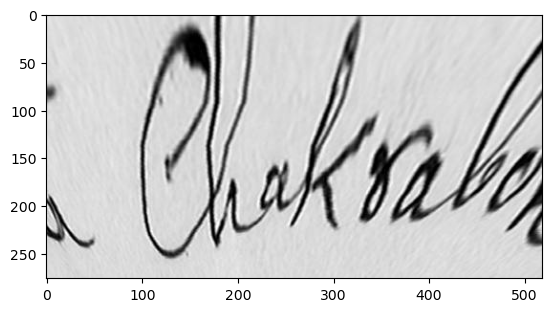

In [7]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25//train//subject_1//signature_9.jpg')
plt.imshow(img)
# print(img.shape)

In [8]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25//train//subject_1//signature_11.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25//train//subject_1//signature_11.jpg')

(276, 519, 3)


array([[[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [ 87,  87,  87],
        [ 76,  76,  76],
        [ 67,  67,  67]],

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [222, 222, 222],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [213, 213, 213],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [216, 216, 216]],

       [[215, 215, 215],
        [215, 215, 215],
        [216, 216, 216],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [220, 220, 220],
        [221, 221, 221],
        [221, 221, 221]]

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [19]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1273 images belonging to 16 classes.
Found 327 images belonging to 16 classes.


In [20]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## 25 Epoch 
## Sigmoid 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
40/40 [==============================] - 16s 342ms/step - loss: 2.7964 - accuracy: 0.0841 - val_loss: 2.7693 - val_accuracy: 0.0917
Epoch 2/25
40/40 [==============================] - 13s 333ms/step - loss: 2.7721 - accuracy: 0.0809 - val_loss: 2.7624 - val_accuracy: 0.0979
Epoch 3/25
40/40 [==============================] - 17s 421ms/step - loss: 2.7609 - accuracy: 0.0864 - val_loss: 2.7690 - val_accuracy: 0.0550
Epoch 4/25
40/40 [==============================] - 17s 435ms/step - loss: 2.7647 - accuracy: 0.0668 - val_loss: 2.7588 - val_accuracy: 0.0979
Epoch 5/25
40/40 [==============================] - 17s 420ms/step - loss: 2.7488 - accuracy: 0.0872 - val_loss: 2.7588 - val_accuracy: 0.1009
Epoch 6/25
40/40 [==============================] - 17s 434ms/step - loss: 2.7430 - accuracy: 0.0935 - val_loss: 2.7532 - val_accuracy: 0.0948
Epoch 7/25
40/40 [==============================] - 18s 445ms/step - loss: 2.7354 - accuracy: 0.0943 - val_loss: 2.7495 - val_accuracy: 0.1009

In [22]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 2s 138ms/step - loss: 2.4681 - accuracy: 0.1743
Test Loss: 2.468066692352295
Test Accuracy: 0.17431192100048065
11/11 [==============================] - 2s 133ms/step


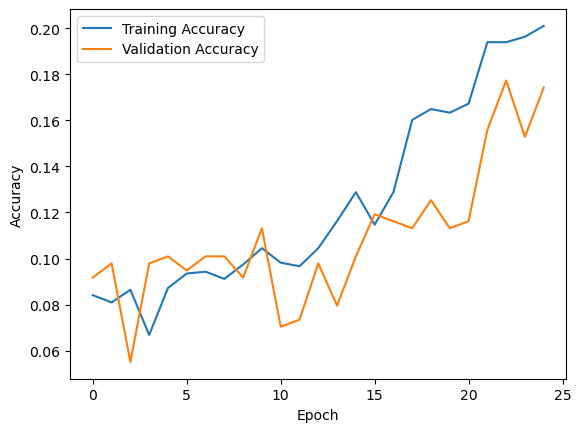

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

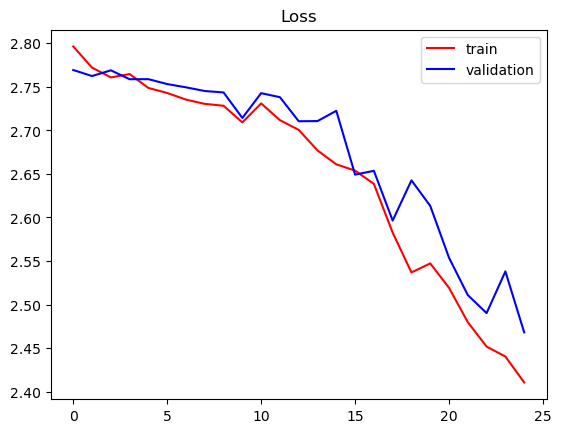

In [24]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [25]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 2s 139ms/step
Confusion Matrix:
[[ 0  4  1  0  1  0  5  1  0  0  0  0  0  0  3  1]
 [ 0  9  1  2  2  0  4  0  0  1  0  0  1  0  3  0]
 [ 0  2  3  1  3  0  9  0  0  0  1  0  0  0  3  1]
 [ 0  2  1 13  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0 12  0  0  0  0  0  0  0  2  0]
 [ 0  4  3  4  1  0  1  1  0  0  0  0  0  0  3  2]
 [ 0  0  0  0  0  0 19  0  1  0  1  0  0  0  1  1]
 [ 0  3  3 10  0  0  1  2  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0 15  0  3  0  0  0  0  0  1  1]
 [ 0  4  3  0  0  0  6  0  0  1  2  0  0  0  3  0]
 [ 0  2  2  2  0  0  5  0  1  3  0  0  0  0  5  1]
 [ 0  3  2  3  2  0  3  4  0  0  1  0  0  0  5  2]
 [ 0  1  1  0  1  0 13  0  0  0  1  0  0  0  2  0]
 [ 0  5  0 12  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  9  0  1  0  0  0  0  1  6  2]
 [ 0  2  2  0  0  0 12  0  0  0  0  0  0  0  4  1]]


11/11 [==============================] - 2s 144ms/step


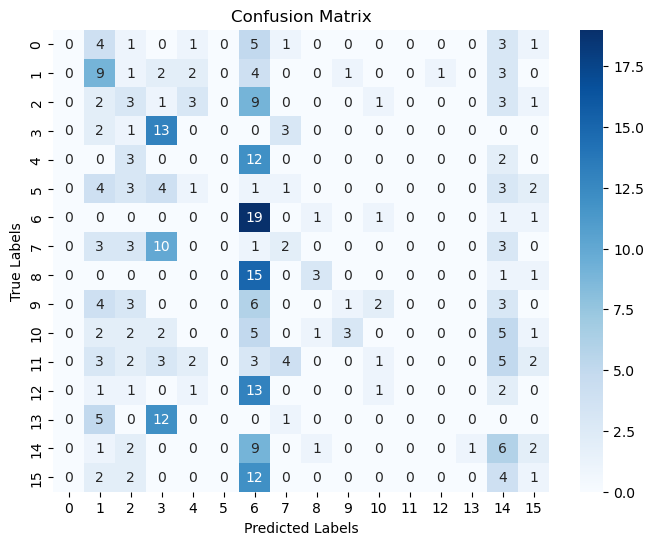

In [26]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3913, FPR = 0.1086, TNR = 0.8914, FNR = 0.6087
Class 2: TPR = 0.1304, FPR = 0.0789, TNR = 0.9211, FNR = 0.8696
Class 3: TPR = 0.6842, FPR = 0.1104, TNR = 0.8896, FNR = 0.3158
Class 4: TPR = 0.0000, FPR = 0.0323, TNR = 0.9677, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.8261, FPR = 0.3125, TNR = 0.6875, FNR = 0.1739
Class 7: TPR = 0.0909, FPR = 0.0328, TNR = 0.9672, FNR = 0.9091
Class 8: TPR = 0.1500, FPR = 0.0098, TNR = 0.9902, FNR = 0.8500
Class 9: TPR = 0.0526, FPR = 0.0130, TNR = 0.9870, FNR = 0.9474
Class 10: TPR = 0.0000, FPR = 0.0196, TNR = 0.9804, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 14: TPR = 0.2727, FPR = 0.1246, TNR = 0.8754, FNR = 0.7273
Class 15: TPR = 0.0476, FPR = 0.035

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5784\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5784\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


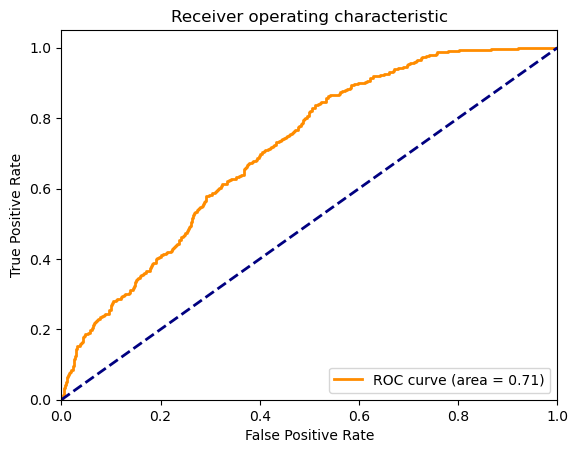

In [28]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 2s 140ms/step - loss: 2.4681 - accuracy: 0.1743
Test Loss: 2.468066692352295
Test Accuracy: 0.17431192100048065
11/11 [==============================] - 2s 135ms/step
AUC for class 0: 0.4622
AUC for class 1: 0.6848
AUC for class 2: 0.6150
AUC for class 3: 0.9308
AUC for class 4: 0.7846
AUC for class 5: 0.7056
AUC for class 6: 0.8212
AUC for class 7: 0.7851
AUC for class 8: 0.8932
AUC for class 9: 0.5837
AUC for class 10: 0.5056
AUC for class 11: 0.5306
AUC for class 12: 0.7008
AUC for class 13: 0.8729
AUC for class 14: 0.6200
AUC for class 15: 0.6402


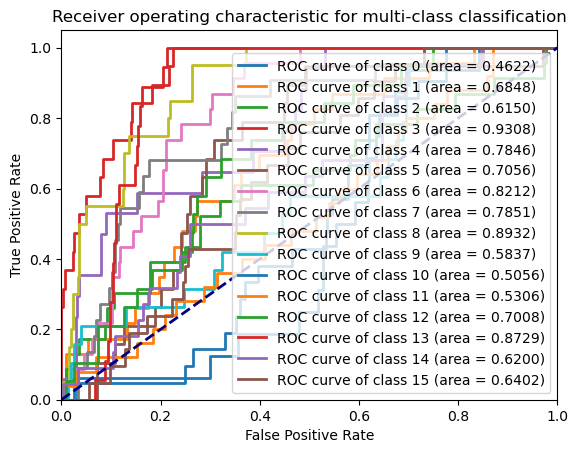

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## RELU

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='relu'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)


Epoch 1/25
40/40 [==============================] - 49s 1s/step - loss: 7.7394 - accuracy: 0.0715 - val_loss: 7.6689 - val_accuracy: 0.0703
Epoch 2/25
40/40 [==============================] - 40s 1000ms/step - loss: 7.6516 - accuracy: 0.0723 - val_loss: 7.6639 - val_accuracy: 0.0703
Epoch 3/25
40/40 [==============================] - 40s 989ms/step - loss: 7.6496 - accuracy: 0.0550 - val_loss: 7.6622 - val_accuracy: 0.0612
Epoch 4/25
40/40 [==============================] - 39s 978ms/step - loss: 7.6487 - accuracy: 0.0762 - val_loss: 7.6618 - val_accuracy: 0.0703
Epoch 5/25
40/40 [==============================] - 45s 1s/step - loss: 7.6485 - accuracy: 0.0723 - val_loss: 7.6603 - val_accuracy: 0.0856
Epoch 6/25
40/40 [==============================] - 43s 1s/step - loss: 7.6467 - accuracy: 0.0778 - val_loss: 7.6591 - val_accuracy: 0.0642
Epoch 7/25
40/40 [==============================] - 35s 875ms/step - loss: 7.6474 - accuracy: 0.0731 - val_loss: 7.6638 - val_accuracy: 0.0826
Epoch 8

In [8]:
# Evaluate the LSTM model for activation function = relu
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 4s 351ms/step - loss: 6.7604 - accuracy: 0.0612
Test Loss: 6.7603631019592285
Test Accuracy: 0.061162080615758896
11/11 [==============================] - 6s 316ms/step


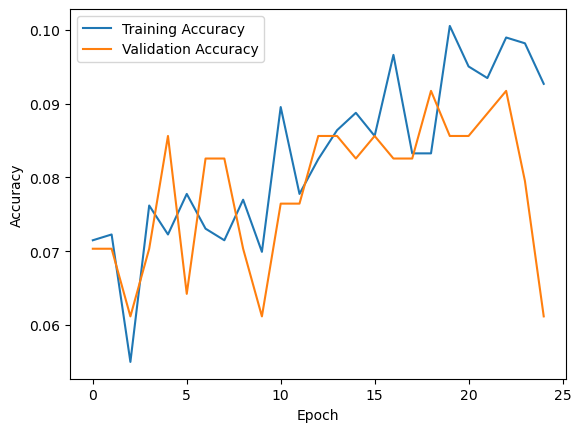

In [9]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

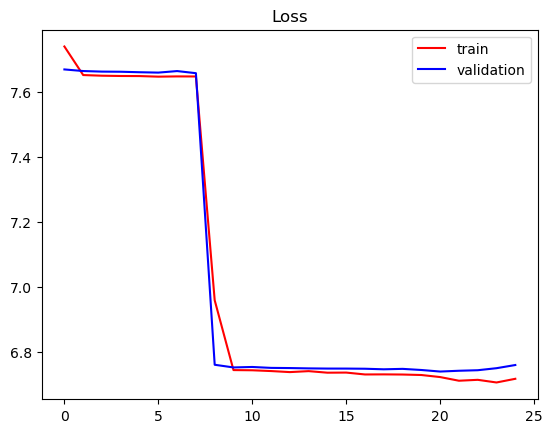

In [10]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [11]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 4s 332ms/step
Confusion Matrix:
[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  2  0  2  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  1  1  0  0  1  0  0  0  0]
 [20  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


11/11 [==============================] - 4s 334ms/step


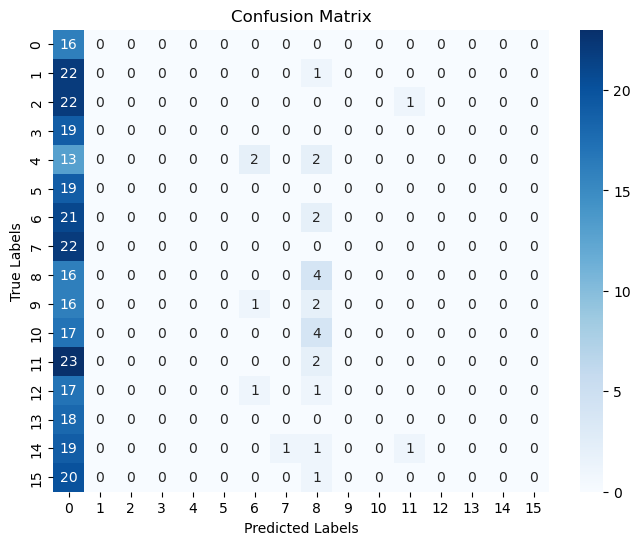

In [12]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 1.0000, FPR = 0.9132, TNR = 0.0868, FNR = 0.0000
Class 1: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 2: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 3: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.0000, FPR = 0.0132, TNR = 0.9868, FNR = 1.0000
Class 7: TPR = 0.0000, FPR = 0.0033, TNR = 0.9967, FNR = 1.0000
Class 8: TPR = 0.2000, FPR = 0.0521, TNR = 0.9479, FNR = 0.8000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0066, TNR = 0.9934, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.000

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3212\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3212\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


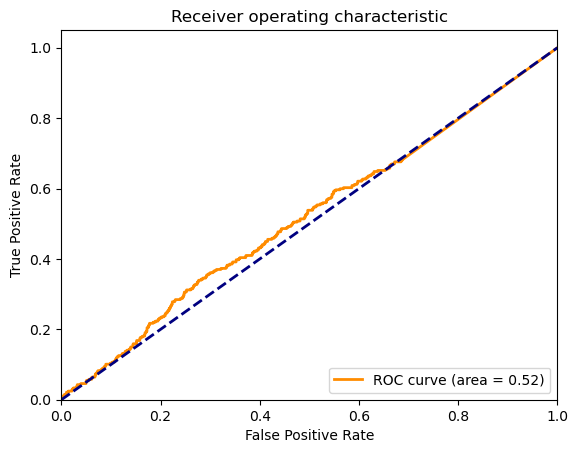

In [14]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 4s 338ms/step - loss: 6.7604 - accuracy: 0.0612
Test Loss: 6.7603631019592285
Test Accuracy: 0.061162080615758896
11/11 [==============================] - 4s 381ms/step
AUC for class 0: 0.5301
AUC for class 1: 0.5000
AUC for class 2: 0.5908
AUC for class 3: 0.5000
AUC for class 4: 0.5083
AUC for class 5: 0.5583
AUC for class 6: 0.5023
AUC for class 7: 0.6082
AUC for class 8: 0.6101
AUC for class 9: 0.5921
AUC for class 10: 0.5000
AUC for class 11: 0.5850
AUC for class 12: 0.5000
AUC for class 13: 0.6210
AUC for class 14: 0.5000
AUC for class 15: 0.4928


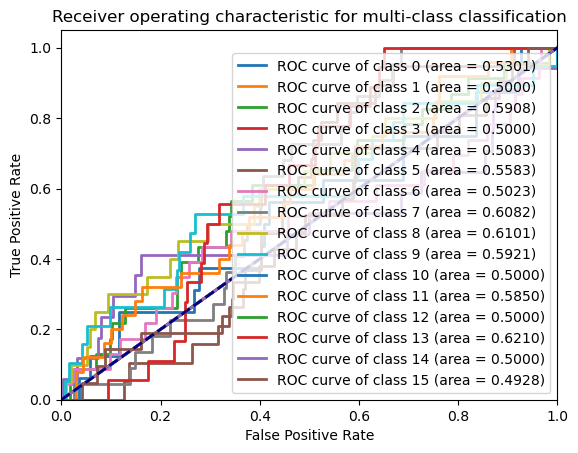

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## Softmax

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)


Epoch 1/25
40/40 [==============================] - 57s 1s/step - loss: 2.8035 - accuracy: 0.0597 - val_loss: 2.7709 - val_accuracy: 0.0673
Epoch 2/25
40/40 [==============================] - 55s 1s/step - loss: 2.7745 - accuracy: 0.0605 - val_loss: 2.7606 - val_accuracy: 0.0734
Epoch 3/25
40/40 [==============================] - 59s 1s/step - loss: 2.7658 - accuracy: 0.0668 - val_loss: 2.7600 - val_accuracy: 0.0734
Epoch 4/25
40/40 [==============================] - 80s 2s/step - loss: 2.7594 - accuracy: 0.0841 - val_loss: 2.7558 - val_accuracy: 0.0734
Epoch 5/25
40/40 [==============================] - 72s 2s/step - loss: 2.7520 - accuracy: 0.0919 - val_loss: 2.7516 - val_accuracy: 0.1101
Epoch 6/25
40/40 [==============================] - 74s 2s/step - loss: 2.7509 - accuracy: 0.0982 - val_loss: 2.7608 - val_accuracy: 0.0734
Epoch 7/25
40/40 [==============================] - 77s 2s/step - loss: 2.7513 - accuracy: 0.0903 - val_loss: 2.7551 - val_accuracy: 0.1131
Epoch 8/25
40/40 [==

In [7]:

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)


11/11 [==============================] - 3s 227ms/step - loss: 2.4977 - accuracy: 0.1376
Test Loss: 2.497695207595825
Test Accuracy: 0.1376146823167801
11/11 [==============================] - 4s 207ms/step


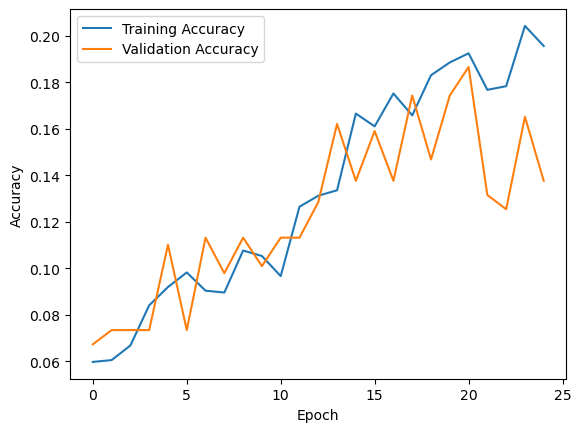

In [8]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

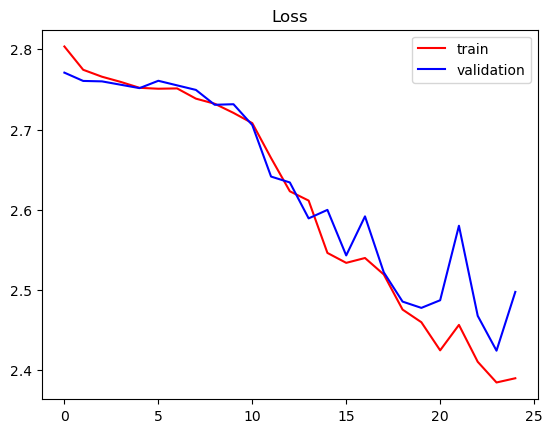

In [9]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [10]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 3s 218ms/step
Confusion Matrix:
[[ 0  5  1  5  0  0  1  1  0  0  0  1  0  1  1  0]
 [ 0  9  0  9  0  0  1  0  0  0  4  0  0  0  0  0]
 [ 0  9  0  4  0  0  1  2  1  0  2  1  0  1  0  2]
 [ 0  0  0 18  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  1  1  2  0  3  1  2  0  3  0  0  1  0  0]
 [ 0  1  0 16  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  4  1  0  2  0  3  0  4  0  7  0  0  0  2  0]
 [ 0  0  0 18  0  1  1  1  0  0  1  0  0  0  0  0]
 [ 0  1  1  0  2  0  4  0  6  0  4  0  0  0  1  1]
 [ 0  6  0  3  0  1  1  3  0  0  4  1  0  0  0  0]
 [ 0  7  0  7  0  1  0  0  1  0  2  1  1  1  0  0]
 [ 0 10  1 10  0  0  0  2  0  0  1  1  0  0  0  0]
 [ 0  6  1  1  0  0  0  0  1  0  5  0  1  1  1  2]
 [ 0  1  0 16  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 10  0  3  1  0  1  1  0  0  2  2  0  0  1  1]
 [ 0  6  0  4  0  0  1  0  3  0  4  2  0  1  0  0]]


11/11 [==============================] - 2s 215ms/step


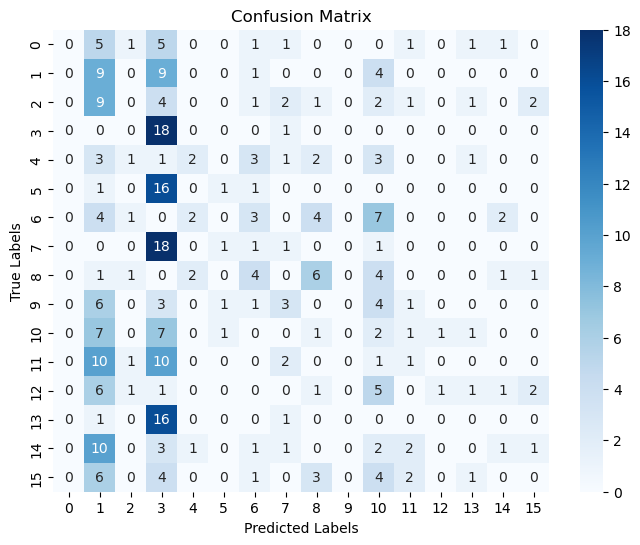

In [11]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3913, FPR = 0.2270, TNR = 0.7730, FNR = 0.6087
Class 2: TPR = 0.0000, FPR = 0.0197, TNR = 0.9803, FNR = 1.0000
Class 3: TPR = 0.9474, FPR = 0.3149, TNR = 0.6851, FNR = 0.0526
Class 4: TPR = 0.1176, FPR = 0.0161, TNR = 0.9839, FNR = 0.8824
Class 5: TPR = 0.0526, FPR = 0.0097, TNR = 0.9903, FNR = 0.9474
Class 6: TPR = 0.1304, FPR = 0.0493, TNR = 0.9507, FNR = 0.8696
Class 7: TPR = 0.0455, FPR = 0.0393, TNR = 0.9607, FNR = 0.9545
Class 8: TPR = 0.3000, FPR = 0.0391, TNR = 0.9609, FNR = 0.7000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0952, FPR = 0.1209, TNR = 0.8791, FNR = 0.9048
Class 11: TPR = 0.0400, FPR = 0.0265, TNR = 0.9735, FNR = 0.9600
Class 12: TPR = 0.0526, FPR = 0.0032, TNR = 0.9968, FNR = 0.9474
Class 13: TPR = 0.0000, FPR = 0.0194, TNR = 0.9806, FNR = 1.0000
Class 14: TPR = 0.0455, FPR = 0.0164, TNR = 0.9836, FNR = 0.9545
Class 15: TPR = 0.0000, FPR = 0.019

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18856\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18856\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


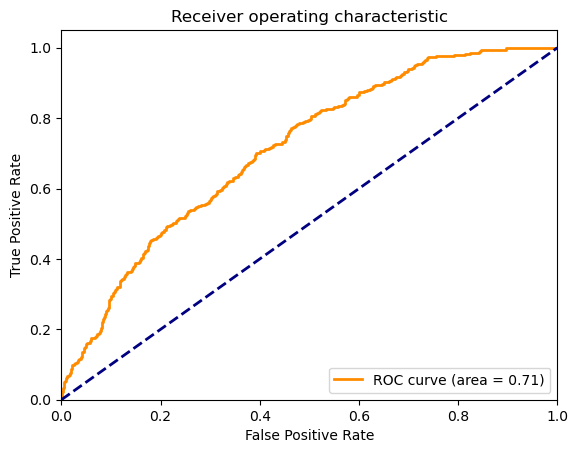

In [13]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 2s 203ms/step - loss: 2.4977 - accuracy: 0.1376
Test Loss: 2.497695207595825
Test Accuracy: 0.1376146823167801
11/11 [==============================] - 2s 197ms/step
AUC for class 0: 0.6686
AUC for class 1: 0.7486
AUC for class 2: 0.6073
AUC for class 3: 0.9057
AUC for class 4: 0.7408
AUC for class 5: 0.8055
AUC for class 6: 0.8484
AUC for class 7: 0.7858
AUC for class 8: 0.9033
AUC for class 9: 0.6046
AUC for class 10: 0.6203
AUC for class 11: 0.6041
AUC for class 12: 0.7245
AUC for class 13: 0.8369
AUC for class 14: 0.6171
AUC for class 15: 0.5878


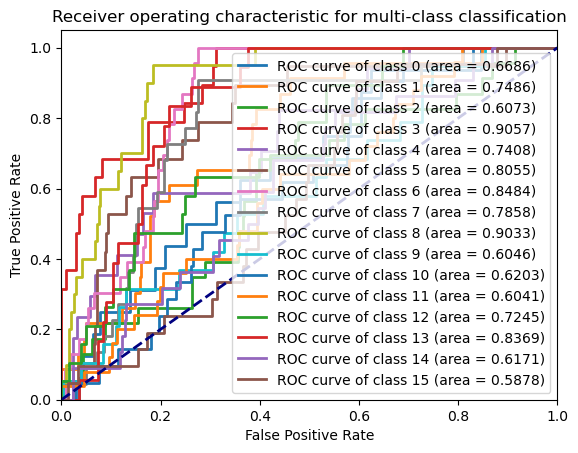

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()